## This notebook is visualization of my location history from 2013-2018

* Places where i visited.
* I analysed my last 1 month of data and used KMean clustering algorithm for find my location on weekdays and on weekends

In [82]:
import pandas as pd
import json
import os
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import numpy as np

## Reading JSON File

In [44]:
with open('LocationHistory.json',encoding='utf-8') as datafile:
    data = json.loads(datafile.read())

df = pd.DataFrame(data['locations'])

In [45]:
df.shape

(835869, 9)

In [46]:
df.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy
0,32,NaN,NaN,NaN,128518710,776563077,1542426878341,NaN,NaN
1,25,"[{'timestampMs': '1542426559889', 'activity': ...",NaN,NaN,128518720,776563012,1542426516127,NaN,NaN
2,25,NaN,NaN,NaN,128518720,776563012,1542426143607,NaN,NaN
3,28,NaN,NaN,NaN,128518825,776563026,1542426082232,NaN,NaN
4,29,NaN,NaN,NaN,128518348,776562485,1542425696306,NaN,NaN


In [47]:
df['timestampMs'] = pd.to_datetime(df['timestampMs'],unit='ms')
df['Date'] = df['timestampMs'].dt.date
df['Time'] = df['timestampMs'].dt.time

In [48]:
df['latitudeE7'] = df['latitudeE7']/1e7
df['longitudeE7'] = df['longitudeE7']/1e7
df.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,Date,Time
0,32,NaN,NaN,NaN,12.851871,77.656308,2018-11-17 03:54:38.341,NaN,NaN,2018-11-17,03:54:38.341000
1,25,"[{'timestampMs': '1542426559889', 'activity': ...",NaN,NaN,12.851872,77.656301,2018-11-17 03:48:36.127,NaN,NaN,2018-11-17,03:48:36.127000
2,25,NaN,NaN,NaN,12.851872,77.656301,2018-11-17 03:42:23.607,NaN,NaN,2018-11-17,03:42:23.607000
3,28,NaN,NaN,NaN,12.851883,77.656303,2018-11-17 03:41:22.232,NaN,NaN,2018-11-17,03:41:22.232000
4,29,NaN,NaN,NaN,12.851835,77.656249,2018-11-17 03:34:56.306,NaN,NaN,2018-11-17,03:34:56.306000


In [49]:
df.tail()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,Date,Time
835864,27,"[{'timestampMs': '1388686224123', 'activity': ...",NaN,NaN,26.249722,78.169696,2014-01-02 18:10:23.317,NaN,NaN,2014-01-02,18:10:23.317000
835865,27,NaN,NaN,NaN,26.249722,78.169696,2014-01-02 18:09:23.244,NaN,NaN,2014-01-02,18:09:23.244000
835866,27,NaN,NaN,NaN,26.249722,78.169696,2014-01-02 18:08:23.220,NaN,NaN,2014-01-02,18:08:23.220000
835867,27,"[{'timestampMs': '1388686043943', 'activity': ...",NaN,NaN,26.249722,78.169696,2014-01-02 18:07:23.163,NaN,NaN,2014-01-02,18:07:23.163000
835868,2770,NaN,NaN,NaN,26.250445,78.178779,2013-12-31 13:19:52.203,NaN,NaN,2013-12-31,13:19:52.203000


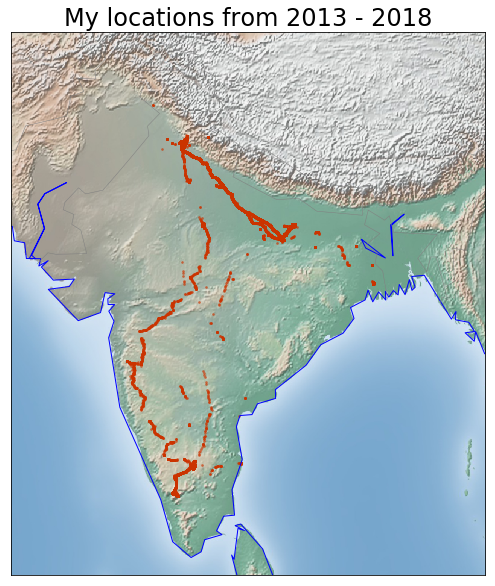

In [50]:
## Plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set_title("My locations from 2013 - 2018", fontsize=24)

# Northmost - lat long 33.25615, 76.79877 (33.25615, 97.16575)
## WestMost - 23.71307, 68.03215
# SouthMost - 6.74678, 93.8426 ( 6.74678, 68.03215)
## EastMost - 27.13611, 97.16575

map = Basemap(projection='lcc', resolution='c', lat_0=26.249722, lon_0=78.169696,llcrnrlon=68.03215,llcrnrlat=6.74678,urcrnrlon=97.16575,urcrnrlat=35.67452)

map.shadedrelief()
map.drawcoastlines(color='blue')
map.drawcountries(color='gray')
map.drawstates(color='orange')

## long, lat
x, y = map(df['longitudeE7'].values, df['latitudeE7'].values)

map.scatter(x,y, color='#cc3300',alpha=0.5, s=3)

plt.show()

### Creating DataFrame for only one month - November 2018

In [51]:
df_nov_18 = df.loc[(df['timestampMs']<'2018-11-18') & (df['timestampMs']>'2018-10-30')]
df_nov_18.shape

(8269, 11)

In [52]:
df_nov_18.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,Date,Time
0,32,NaN,NaN,NaN,12.851871,77.656308,2018-11-17 03:54:38.341,NaN,NaN,2018-11-17,03:54:38.341000
1,25,"[{'timestampMs': '1542426559889', 'activity': ...",NaN,NaN,12.851872,77.656301,2018-11-17 03:48:36.127,NaN,NaN,2018-11-17,03:48:36.127000
2,25,NaN,NaN,NaN,12.851872,77.656301,2018-11-17 03:42:23.607,NaN,NaN,2018-11-17,03:42:23.607000
3,28,NaN,NaN,NaN,12.851883,77.656303,2018-11-17 03:41:22.232,NaN,NaN,2018-11-17,03:41:22.232000
4,29,NaN,NaN,NaN,12.851835,77.656249,2018-11-17 03:34:56.306,NaN,NaN,2018-11-17,03:34:56.306000


In [53]:
df_nov_18.tail()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,Date,Time
8264,699,"[{'timestampMs': '1540859181459', 'activity': ...",NaN,NaN,12.852104,77.657371,2018-10-30 00:26:17.914,NaN,NaN,2018-10-30,00:26:17.914000
8265,699,"[{'timestampMs': '1540859028764', 'activity': ...",NaN,NaN,12.852104,77.657371,2018-10-30 00:23:45.173,NaN,NaN,2018-10-30,00:23:45.173000
8266,1041,NaN,NaN,NaN,12.857557,77.655347,2018-10-30 00:13:14.298,NaN,NaN,2018-10-30,00:13:14.298000
8267,1041,NaN,NaN,NaN,12.857557,77.655347,2018-10-30 00:02:03.285,NaN,NaN,2018-10-30,00:02:03.285000
8268,800,"[{'timestampMs': '1540857605527', 'activity': ...",NaN,NaN,12.851432,77.658087,2018-10-30 00:00:01.968,NaN,NaN,2018-10-30,00:00:01.968000


### Adding a column as weekdays name.

In [54]:
df_nov_18['day_of_week'] = df_nov_18['timestampMs'].dt.day_name()

C:\Users\ABC\Miniconda3\envs\final\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
df_nov_18.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,Date,Time,day_of_week
0,32,NaN,NaN,NaN,12.851871,77.656308,2018-11-17 03:54:38.341,NaN,NaN,2018-11-17,03:54:38.341000,Saturday
1,25,"[{'timestampMs': '1542426559889', 'activity': ...",NaN,NaN,12.851872,77.656301,2018-11-17 03:48:36.127,NaN,NaN,2018-11-17,03:48:36.127000,Saturday
2,25,NaN,NaN,NaN,12.851872,77.656301,2018-11-17 03:42:23.607,NaN,NaN,2018-11-17,03:42:23.607000,Saturday
3,28,NaN,NaN,NaN,12.851883,77.656303,2018-11-17 03:41:22.232,NaN,NaN,2018-11-17,03:41:22.232000,Saturday
4,29,NaN,NaN,NaN,12.851835,77.656249,2018-11-17 03:34:56.306,NaN,NaN,2018-11-17,03:34:56.306000,Saturday


### Adding column as Geolocation name from Latitude and Longitude (Reverse Geocoding)

In [142]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
str1 = "12.85205778"
str2 = "77.65651002"
location = geolocator.reverse(str1+","+str2) ## Latitude,Longitude
print(location.address)

#12.85205778, 77.65651002
## Weekdays
# str1 = "12.84974063"
# str2 = "77.65922141"
# Address : The Oterra Bengaluru Electronics City, 43, Hewlett Packard Avenue, Hewlett Packard GlobalSoft Pvt. Ltd., Electronics City Phase 1,
# Vittasandra, Bangalore Urban, Karnataka, 560100, India

Doddathoguru, Electronics City Phase 1, Vittasandra, Bangalore Urban, Karnataka, 560 100, India


In [58]:
for i in range(len(df_nov_18['latitudeE7'])):
    latitude = str(df_nov_18.loc[i,'latitudeE7'])
    longitude = str(df_nov_18.loc[i,'longitudeE7'])
    df_nov_18.loc[i,'LocationName'] = geolocator.reverse(latitude+","+longitude,timeout=100000).address

df_nov_18.head()

GeocoderServiceError: [Errno 11001] getaddrinfo failed

In [57]:
df_nov_18.columns

Index(['accuracy', 'activity', 'altitude', 'heading', 'latitudeE7',
       'longitudeE7', 'timestampMs', 'velocity', 'verticalAccuracy', 'Date',
       'Time', 'day_of_week'],
      dtype='object')

### Fetching location on weekdays in office

In [59]:
df_nov_18_weekdays = df_nov_18[(df_nov_18['day_of_week'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) & 
                               (df_nov_18['Time'].astype(str)>'09:00:00') & (df_nov_18['Time'].astype(str)<'18:00:00')]

In [69]:
## dropping unnecessary columns
df_nov_18_weekdays.loc[:,['accuracy', 'activity', 'altitude', 'heading', 'velocity', 'verticalAccuracy']]
df_nov_18_weekdays.drop(df_nov_18_weekdays.loc[:,['accuracy', 'activity', 'altitude', 'heading', 'velocity', 'verticalAccuracy']],axis=1,inplace=True)


C:\Users\ABC\Miniconda3\envs\final\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
df_nov_18_weekdays.tail()

,latitudeE7,longitudeE7,timestampMs,Date,Time,day_of_week
8010,12.845754,77.661833,2018-10-30 09:11:53.012,2018-10-30,09:11:53.012000,Tuesday
8011,12.846696,77.662382,2018-10-30 09:09:38.099,2018-10-30,09:09:38.099000,Tuesday
8012,12.846696,77.662382,2018-10-30 09:07:37.520,2018-10-30,09:07:37.520000,Tuesday
8013,12.846696,77.662382,2018-10-30 09:05:37.230,2018-10-30,09:05:37.230000,Tuesday
8014,12.846696,77.662382,2018-10-30 09:01:20.114,2018-10-30,09:01:20.114000,Tuesday


### Applying Clustering Algorithm on Longitude and Latitude

In [146]:
df_nov_18_weekdaysLatLong = df_nov_18_weekdays.loc[:,['latitudeE7','longitudeE7']]

id_n=2
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(df_nov_18_weekdaysLatLong)
id_label=kmeans.labels_


### Finding mean and address of cluster

In [147]:
center = kmeans.cluster_centers_
center

array([[12.84974063, 77.65922141],
       [12.8933189 , 77.5965061 ]])

In [148]:
## Finding address

geolocator = Nominatim(user_agent="specify_your_app_name_here")
str1 = "12.84974063"
str2 = "77.65922141"
location = geolocator.reverse(str1+","+str2) ## Latitude,Longitude
print(location.address)

The Oterra Bengaluru Electronics City, 43, Hewlett Packard Avenue, Hewlett Packard GlobalSoft Pvt. Ltd., Electronics City Phase 1, Vittasandra, Bangalore Urban, Karnataka, 560100, India


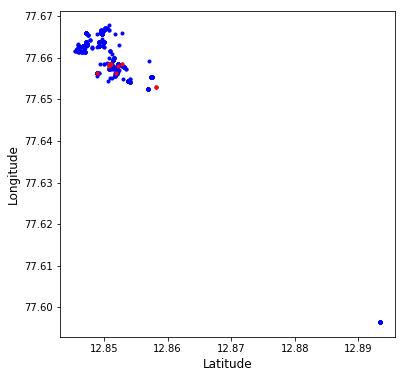

In [109]:
## Plotting results

ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(6,6))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(df_nov_18_weekdaysLatLong.latitudeE7[cluster].values,df_nov_18_weekdaysLatLong.longitudeE7[cluster].values,ptsymb[i])
plt.show()


### Fetching location on weekends

In [99]:
df_nov_18_weekend = df_nov_18[df_nov_18['day_of_week'].isin(['Saturday','Sunday'])]
df_nov_18_weekend.loc[:,['accuracy', 'activity', 'altitude', 'heading', 'velocity', 'verticalAccuracy']]

df_nov_18_weekend.drop(df_nov_18_weekend.loc[:,['accuracy', 'activity', 'altitude', 'heading', 'velocity', 'verticalAccuracy']],axis=1,inplace=True)

C:\Users\ABC\Miniconda3\envs\final\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [120]:
df_nov_18_weekend.head()

,latitudeE7,longitudeE7,timestampMs,Date,Time,day_of_week
0,12.851871,77.656308,2018-11-17 03:54:38.341,2018-11-17,03:54:38.341000,Saturday
1,12.851872,77.656301,2018-11-17 03:48:36.127,2018-11-17,03:48:36.127000,Saturday
2,12.851872,77.656301,2018-11-17 03:42:23.607,2018-11-17,03:42:23.607000,Saturday
3,12.851883,77.656303,2018-11-17 03:41:22.232,2018-11-17,03:41:22.232000,Saturday
4,12.851835,77.656249,2018-11-17 03:34:56.306,2018-11-17,03:34:56.306000,Saturday


In [143]:
## Plotting weekend data

df_nov_18_weekendLatLong = df_nov_18_weekend.loc[:,['latitudeE7','longitudeE7']]

id_n=2
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(df_nov_18_weekendLatLong)


### Finding mean of weekend data

In [144]:
id_label_=kmeans.labels_
center = kmeans.cluster_centers_
print("Centroid of cluster",center)

Centroid of cluster [[12.85205778 77.65651002]
 [12.8933189  77.5965061 ]]


In [145]:
## Getting address for this centroid.

geolocator = Nominatim(user_agent="specify_your_app_name_here")
str1 = "12.85205778"
str2 = "77.65651002"
location = geolocator.reverse(str1+","+str2) ## Latitude,Longitude
print(location.address)

Doddathoguru, Electronics City Phase 1, Vittasandra, Bangalore Urban, Karnataka, 560 100, India


In [88]:
df_nov_18_weekend.head()

,latitudeE7,longitudeE7,timestampMs,Date,Time,day_of_week
0,12.851871,77.656308,2018-11-17 03:54:38.341,2018-11-17,03:54:38.341000,Saturday
1,12.851872,77.656301,2018-11-17 03:48:36.127,2018-11-17,03:48:36.127000,Saturday
2,12.851872,77.656301,2018-11-17 03:42:23.607,2018-11-17,03:42:23.607000,Saturday
3,12.851883,77.656303,2018-11-17 03:41:22.232,2018-11-17,03:41:22.232000,Saturday
4,12.851835,77.656249,2018-11-17 03:34:56.306,2018-11-17,03:34:56.306000,Saturday


* Address at weekdays and weekends are different. For weekdays cluster center is around my office and for weekends its near my resident.